We start by importing the necessary packages

In [45]:
import sys
import math 
import warnings; warnings.filterwarnings("ignore") #delete warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
a

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder

We import the dataset and we perform a screening to check the variable integrity:

In [51]:
#filepath= os.path.expanduser("/Users/geoffreyoget/Documents/KULeuven/Certificate IABE/Assignment/IABE-module1/assignment_data.csv")
#filepath
mtpl=pd.read_csv("/Users/geoffreyoget/Documents/KULeuven/Certificate IABE/Assignment/IABE-module1/assignment_data.csv")
mtpl.tail(25)

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
163632,37,9800,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66
163633,50,9800,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Twice,Private,No,No,MTPL,<66
163634,72,9820,1.000000,0.0000,0,0.0,0.000000,2-5,Male,Petrol,Monthly,Private,No,No,MTPL,<66
163635,47,9820,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Monthly,Private,No,No,MTPL,<66
163636,58,9820,1.000000,0.0000,1,1.0,145.017712,>10,Male,Petrol,Once,Private,No,No,MTPL,<66
163637,25,9860,1.000000,0.0000,0,0.0,0.000000,2-5,Male,Gasoil,Once,Private,No,No,MTPL+,<66
163638,50,9870,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66
163639,65,9890,1.000000,0.0000,0,0.0,0.000000,>10,Male,Petrol,Once,Private,No,No,MTPL,<66
163640,59,9890,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66
163641,32,9890,1.000000,0.0000,0,0.0,0.000000,>10,Male,Petrol,Once,Private,No,No,MTPL,<66


In [52]:
mtpl_test=pd.read_csv("/Users/geoffreyoget/Documents/KULeuven/Data Science for Non-Life Insurance/Assignement/Final/data/Assignment2.csv")
mtpl_test.tail(25)

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
163632,37,9800,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66
163633,50,9800,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Twice,Private,No,No,MTPL,<66
163634,72,9820,1.000000,0.0000,0,0.0,0.000000,2-5,Male,Petrol,Monthly,Private,No,No,MTPL,<66
163635,47,9820,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Monthly,Private,No,No,MTPL,<66
163636,58,9820,1.000000,0.0000,1,1.0,145.017712,>10,Male,Petrol,Once,Private,No,No,MTPL,<66
163637,25,9860,1.000000,0.0000,0,0.0,0.000000,2-5,Male,Gasoil,Once,Private,No,No,MTPL+,<66
163638,50,9870,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66
163639,65,9890,1.000000,0.0000,0,0.0,0.000000,>10,Male,Petrol,Once,Private,No,No,MTPL,<66
163640,59,9890,1.000000,0.0000,0,0.0,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66
163641,32,9890,1.000000,0.0000,0,0.0,0.000000,>10,Male,Petrol,Once,Private,No,No,MTPL,<66


We observe 16 variables in total among which we have the target variables "nbrtotc" for the claim frequency and "chargtot" for the claim severity. We observe the exposure under the name 

In [28]:
print(mtpl.isnull().sum())

AGEPH       0
CODPOSS     0
duree       0
lnexpo      0
nbrtotc     0
nbrtotan    0
chargtot    0
agecar      0
sexp        0
fuelc       0
split       0
usec        0
fleetc      0
sportc      0
coverp      0
powerc      0
dtype: int64


In [29]:
mtpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   duree     163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nbrtotc   163657 non-null  int64  
 5   nbrtotan  163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 20.0+ MB


In [33]:
mtpl.groupby("sexp")["nbrtotc"].sum()



sexp
Female     5640
Male      14650
Name: nbrtotc, dtype: int64

In [34]:
mtpl.groupby("duree")["nbrtotc"].sum()

duree
0.002740        0
0.005479        1
0.008219        3
0.010959        0
0.013699        1
            ...  
0.991781       11
0.994521       12
0.997260       33
1.000000    15956
1.008219        0
Name: nbrtotc, Length: 366, dtype: int64

In [37]:
mtpl[["duree","lnexpo"]].head()

,duree,lnexpo
0,1.000000,0.000000
1,0.046575,-3.066684
2,0.402740,-0.909465
3,0.169863,-1.772763
4,1.000000,0.000000


In [43]:
emp_freq = mtpl.groupby("nbrtotc").agg(tot_obs = ('nbrtotc', 'count'), tot_expo = ('duree', 'sum'))
emp_freq.reset_index(inplace=True)
emp_freq

,nbrtotc,tot_obs,tot_expo
0,0,145312,128595.947945
1,1,16602,15410.320548
2,2,1562,1447.301370
3,3,162,150.454795
4,4,17,14.328767
5,5,2,1.375342


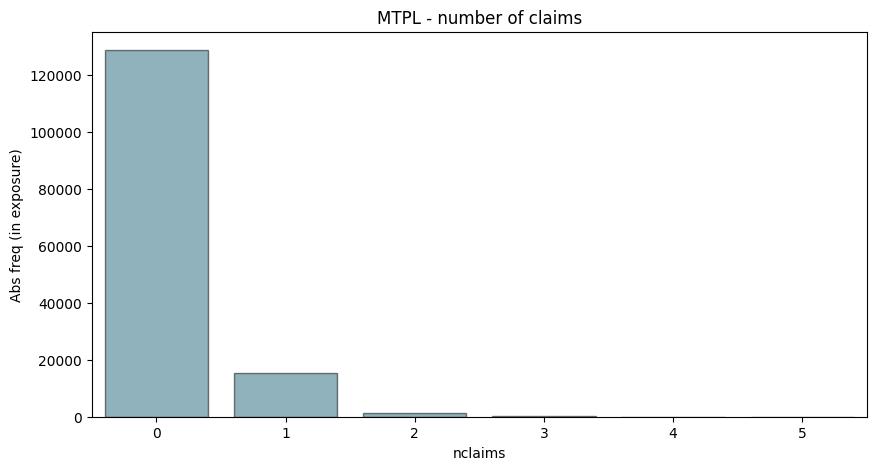

In [50]:
KULbg="#116E8A"
plt.figure(figsize = (10, 5))
sns.barplot(data = emp_freq, x = "nbrtotc", y = "tot_expo", color = KULbg, alpha = 0.5, edgecolor = 'black', linewidth = 1)
plt.ylabel("Abs freq (in exposure)")
plt.xlabel("nclaims")
plt.title('MTPL - number of claims')
plt.show()